In [1]:
%%bash --bg
roscore

Starting job # 0 in a separate thread.


In [2]:
%%bash
rosbag play -l office_1.bag &>/dev/null &

In [14]:
import rospy
from std_msgs.msg import String
from sensor_msgs.msg import Image
from cv_bridge import CvBridge, CvBridgeError
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
rospy.init_node('listener1', anonymous=True)
bridge = CvBridge()

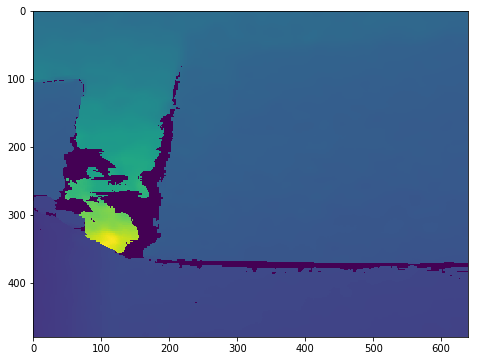

In [18]:
topic = "/camera/aligned_depth_to_color/image_raw"
data = rospy.wait_for_message(topic, Image)
cv_image = bridge.imgmsg_to_cv2(data, data.encoding)
pix = (data.width/2, data.height/2)
#print('%s: Depth at center(%d, %d): %f(mm)\r' % (topic, pix[0], pix[1], cv_image[pix[1], pix[0]]))
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(cv_image)